In [56]:
import simpy
import matplotlib.pyplot as plt
import random

In [57]:
def customer(env, name, counter):
    print(f"{name} arrived at {env.now}")
    with counter.request() as req:
        yield req
        print(f"{name} starts being served at {env.now}")
        yield env.timeout(3)  # Service time (waktu pelayanan)
        print(f"{name} leaves at {env.now}")

In [58]:
def generate_customers(env, counter, arrival_probs):
    customer_count = 0
    while True:
        interval = 1  # Default interval for checking arrivals
        for group, prob in arrival_probs.items():
            if random.random() < prob:
                customer_count += 1
                env.process(customer(env, f"Customer {customer_count} ({group})", counter))
                interval = 0  # Update interval if a customer arrives
        yield env.timeout(interval)

In [59]:
env = simpy.Environment()
counter = simpy.Resource(env, capacity=1)

# Probabilitas kedatangan untuk setiap kelompok (A, B, dan C)
arrival_probs = {
    'ITTS': 0.3,  # Probabilitas kedatangan pelanggan kelompok A
    'UNESA': 0.4,  # Probabilitas kedatangan pelanggan kelompok B
    'OTHER': 0.2   # Probabilitas kedatangan pelanggan kelompok C
}

# Simpan data jumlah pengunjung di setiap waktu
time_points = []
visitor_counts = []



In [60]:
def record_visitors():
    while True:
        time_points.append(env.now / 4)  # Represent 1 jam sebagai 4 unit waktu (15 menit setiap unit)
        visitor_counts.append(len(counter.queue) + len(counter.users))
        yield env.timeout(0.25)  # Rekam data setiap 15 menit

Customer 1 (ITTS) arrived at 0
Customer 2 (UNESA) arrived at 0
Customer 1 (ITTS) starts being served at 0
Customer 3 (ITTS) arrived at 1
Customer 4 (ITTS) arrived at 1
Customer 5 (OTHER) arrived at 1
Customer 6 (UNESA) arrived at 1
Customer 7 (OTHER) arrived at 1
Customer 1 (ITTS) leaves at 3
Customer 8 (UNESA) arrived at 3
Customer 2 (UNESA) starts being served at 3
Customer 9 (ITTS) arrived at 5
Customer 10 (ITTS) arrived at 5
Customer 2 (UNESA) leaves at 6
Customer 11 (ITTS) arrived at 6
Customer 12 (OTHER) arrived at 6
Customer 3 (ITTS) starts being served at 6
Customer 13 (OTHER) arrived at 7
Customer 14 (UNESA) arrived at 8
Customer 15 (OTHER) arrived at 8
Customer 16 (UNESA) arrived at 8
Customer 17 (ITTS) arrived at 8
Customer 18 (UNESA) arrived at 8
Customer 3 (ITTS) leaves at 9
Customer 19 (UNESA) arrived at 9
Customer 4 (ITTS) starts being served at 9
Customer 20 (ITTS) arrived at 11
Customer 21 (OTHER) arrived at 11
Customer 22 (ITTS) arrived at 11
Customer 23 (OTHER) arriv

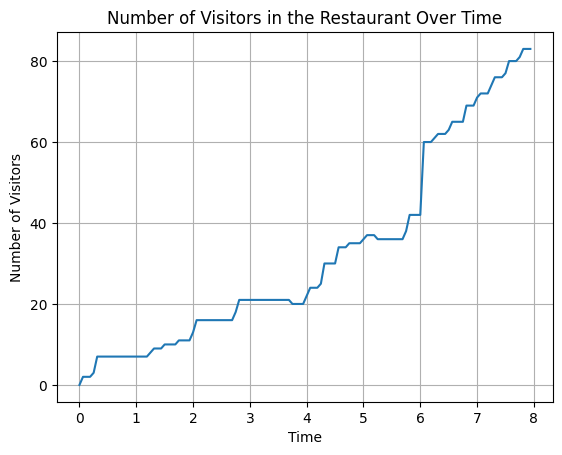

In [61]:
env.process(generate_customers(env, counter, arrival_probs))
env.process(record_visitors())
env.run(until=32)  # Jalankan simulasi hingga waktu 12 jam

plt.plot(time_points, visitor_counts)
plt.xlabel('Time')
plt.ylabel('Number of Visitors')
plt.title('Number of Visitors in the Restaurant Over Time')
plt.grid(True)
plt.show()

Customer 1 (A) arrived at 0
Customer 2 (A) arrived at 0
Customer 3 (B) arrived at 0
Customer 1 (A) starts being served at 0
Customer 4 (B) arrived at 1
Customer 5 (B) arrived at 2
Customer 1 (A) leaves at 3
Customer 6 (B) arrived at 3
Customer 2 (A) starts being served at 3
Customer 7 (A) arrived at 4
Customer 8 (C) arrived at 4
Customer 9 (A) arrived at 5
Customer 10 (C) arrived at 5
Customer 2 (A) leaves at 6
Customer 11 (A) arrived at 6
Customer 12 (B) arrived at 6
Customer 13 (B) arrived at 6
Customer 3 (B) starts being served at 6
Customer 14 (C) arrived at 6
Customer 15 (A) arrived at 6
Customer 16 (B) arrived at 6
Customer 17 (C) arrived at 6
Customer 18 (A) arrived at 6
Customer 19 (B) arrived at 6
Customer 20 (C) arrived at 7
Customer 21 (B) arrived at 7
Customer 3 (B) leaves at 9
Customer 22 (B) arrived at 9
Customer 4 (B) starts being served at 9
Customer 23 (C) arrived at 10
Customer 4 (B) leaves at 12
Customer 24 (C) arrived at 12
Customer 5 (B) starts being served at 12
C

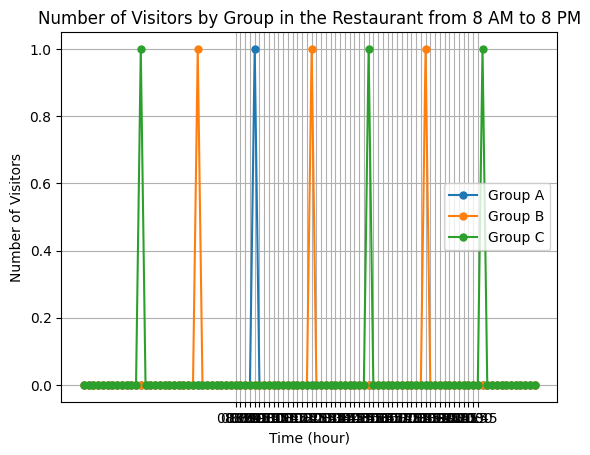

In [68]:
import simpy
import matplotlib.pyplot as plt
import random

def customer(env, name, counter, visitor_data):
    print(f"{name} arrived at {env.now}")
    with counter.request() as req:
        yield req
        print(f"{name} starts being served at {env.now}")
        yield env.timeout(3)  # Service time (waktu pelayanan)
        print(f"{name} leaves at {env.now}")
        
        # Catat data tentang pelanggan yang datang
        interval = int(env.now / 0.25)  # Hitung interval waktu dalam 15 menit
        group = random.choices(['A', 'B', 'C'], [0.3, 0.4, 0.2])[0]  # Pilih kelompok pelanggan secara acak
        visitor_data[interval][group] += 1

def generate_customers(env, counter, arrival_probs, visitor_data):
    customer_count = 0
    while True:
        interval = 1  # Default interval for checking arrivals
        for group, prob in arrival_probs.items():
            if random.random() < prob:
                customer_count += 1
                env.process(customer(env, f"Customer {customer_count} ({group})", counter, visitor_data))
                interval = 0  # Update interval if a customer arrives
        yield env.timeout(interval)

env = simpy.Environment()
counter = simpy.Resource(env, capacity=1)

# Probabilitas kedatangan untuk setiap kelompok (A, B, dan C)
arrival_probs = {
    'A': 0.3,  # Probabilitas kedatangan pelanggan kelompok A
    'B': 0.4,  # Probabilitas kedatangan pelanggan kelompok B
    'C': 0.2   # Probabilitas kedatangan pelanggan kelompok C
}

# Inisialisasi kamus untuk menyimpan data kunjungan berdasarkan kelompok pelanggan pada setiap interval waktu (15 menit)
visitor_data = {i: {'A': 0, 'B': 0, 'C': 0} for i in range(96)}  # 96 interval waktu dalam 24 jam (15 menit per interval)

def record_visitors():
    while True:
        yield env.timeout(0.25)  # Rekam data setiap 15 menit

env.process(generate_customers(env, counter, arrival_probs, visitor_data))
env.process(record_visitors())

env.run(until=24)  # Jalankan simulasi hingga waktu 24 (24 jam)

# Tampilkan data kunjungan berdasarkan kelompok pelanggan pada setiap interval waktu
for interval, data in visitor_data.items():
    print(f"Interval {interval}: {data}")

# Buat grafik garis (line chart)
time_points = [interval / 4 for interval in range(96)]  # Waktu dalam jam (1 jam = 4 interval)

visitor_counts_a = [data['A'] for data in visitor_data.values()]
visitor_counts_b = [data['B'] for data in visitor_data.values()]
visitor_counts_c = [data['C'] for data in visitor_data.values()]

plt.plot(time_points, visitor_counts_a, label='Group A', marker='o', linestyle='-', markersize=5)
plt.plot(time_points, visitor_counts_b, label='Group B', marker='o', linestyle='-', markersize=5)
plt.plot(time_points, visitor_counts_c, label='Group C', marker='o', linestyle='-', markersize=5)

plt.xlabel('Time (hour)')
plt.ylabel('Number of Visitors')
plt.title('Number of Visitors by Group in the Restaurant from 8 AM to 8 PM')
plt.grid(True)
plt.legend()

# Set x-axis ticks to represent 8 AM to 8 PM (15 menit per interval)
xtick_positions = [hour + minute/60 for hour in range(8, 21) for minute in range(0, 60, 15)]
xtick_labels = [f"{hour:02d}:{minute:02d}" for hour in range(8, 21) for minute in range(0, 60, 15)]
plt.xticks(xtick_positions, xtick_labels)

plt.show()